# DSC 10 Lecture 4 - Selecting Rows

### Announcements

- Lab 01/HW 01 due Tomorrow(!) Friday, 11:59pm.
- Just Released:
 - Lab 02 due Monday, 11:59pm.
 - HW 02 due Monday, 11:59pm.

In [13]:
from datascience import *
import numpy as np

<center><img src="summary1.png"  width="800"/></center>

# Sorting Tables

* The `sort` method creates a new table with the same rows in a different order (the original table is unaffected).

* The `show` method displays the first rows of a table

In [2]:
nba = Table.read_table('nba_salaries.csv') # Larger tables have rows omitted
nba 

PLAYER,POSITION,TEAM,'15-'16 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


# About the data

<center><img src="nba_description.png"  width="800"/></center>

### In 2015-16, what was the total payroll for all NBA teams combined?

### What's the largest salary in the NBA in 2015-16? Who earned it?

### How about the top 5?

### What are the optional arguments for `sort`?
* `descending=True`, sorts the column in descending order (default: ascending order).
* `distinct=True`, omits repeated values of the column, keeping the only the first. 

### What does the code below do?

In [3]:
nba.sort(3, descending=True).sort(1, distinct=True)

PLAYER,POSITION,TEAM,'15-'16 SALARY
Dwight Howard,C,Houston Rockets,22.3594
Chris Bosh,PF,Miami Heat,22.1927
Chris Paul,PG,Los Angeles Clippers,21.4687
Kobe Bryant,SF,Los Angeles Lakers,25
Dwyane Wade,SG,Miami Heat,20


<center><img src="q7.png"  width="1000"/></center>

In [4]:
nba.sort(3, descending=False).sort(1, distinct=True)

PLAYER,POSITION,TEAM,'15-'16 SALARY
Ryan Hollins,C,Memphis Grizzlies,0.111444
Cory Jefferson,PF,Phoenix Suns,0.049709
Phil Pressey,PG,Phoenix Suns,0.055722
Thanasis Antetokounmpo,SF,New York Knicks,0.030888
Jordan McRae,SG,Phoenix Suns,0.049709


# Digression: Lists

What happens when you make an array with objects of different types?

In [5]:
data = make_array(1, 3.1415, 'n/a')
data

array(['1', '3.1415', 'n/a'], dtype='<U32')

Wait, what is the type of the first element?

In [6]:
type(data.item(0))

str

## Lists are generic sequences

- Arrays should only hold objects of one type.
- But `list`s can hold objects of different types.

In [7]:
[1, 3.1415, 'hey']

[1, 3.1415, 'hey']

## If lists are more general, why use arrays at all?

Big reason: arrays are fast.

In [8]:
# an array and a list with the same data
n = 9_999_999
arr = np.arange(n)
lst = list(range(n))

In [9]:
%timeit arr.sum() # work with array

6.93 ms ± 116 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%timeit sum(lst) # work with list

86.8 ms ± 624 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Creating tables from lists

Passing a list to `.with_column` converts it to an array implicity.

In [11]:
data = Table().with_column('Stuff', [1, 3.1415, 'hey'])
data

Stuff
1
3.1415
hey


But look at the types...

In [12]:
data.column('Stuff')

array(['1', '3.1415', 'hey'], dtype='<U32')

# Getting rows

In [14]:
nba = Table.read_table('nba_salaries.csv')
nba

PLAYER,POSITION,TEAM,'15-'16 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


## `.select()` columns, `.take()`rows

- We know that `.select()` returns a table with the requested columns
- To get a *table* with requested rows, use `.take()`
- As with `.item()`, counting starts with 0

In [16]:
# get the first row
nba.take(1)

PLAYER,POSITION,TEAM,'15-'16 SALARY
Al Horford,C,Atlanta Hawks,12


## Multiple rows

Take multiple rows by providing a list of row indices:

In [17]:
nba.take([0,5,6])

PLAYER,POSITION,TEAM,'15-'16 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333


In [18]:
#: indices have to be in a list or array
nba.take(0, 5, 6)

PLAYER,POSITION,TEAM,'15-'16 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333


## Discuss

For columns, we have:

- `.select()`: returns a table
- `.column()`: returns an array

For rows, we just have:

- `.take()`: returns a table

Why don't we have something that returns a row as an array?

# Retrieving a row 

In [19]:
nba.row(0)

Row(PLAYER='Paul Millsap', POSITION='PF', TEAM='Atlanta Hawks', '15-'16 SALARY=18.671659)

In [20]:
#compare to
nba.take(0)

PLAYER,POSITION,TEAM,'15-'16 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717


# Retrieving rows conditionally

- We often want to grab a subset of rows *conditionally*, when some condition is satisfied.
- Examples:
    - All NBA players who make over 20 million / year.
    - All point guards (PGs) and centers (Cs).
    - Any player with more than 20 letters in their name

## Predicates

- A predicate is a function that returns `True` or `False`.
- We use predicates as conditions, keeping only rows that satisfy the condition.
- Apply a predicate to each item in a column.
    - Keep entries for which it is `True`.
    - Discard those for which it is `False`.

## The `.where()` method

- Applies a predicate to a column.
- Returns a new table containing only the rows where the predicate is `True`.
- Many predicates are provided.

In [21]:
nba.where("'15-'16 SALARY", are.above(20))

PLAYER,POSITION,TEAM,'15-'16 SALARY
Joe Johnson,SF,Brooklyn Nets,24.8949
Derrick Rose,PG,Chicago Bulls,20.0931
LeBron James,SF,Cleveland Cavaliers,22.9705
Dwight Howard,C,Houston Rockets,22.3594
Chris Paul,PG,Los Angeles Clippers,21.4687
Kobe Bryant,SF,Los Angeles Lakers,25
Chris Bosh,PF,Miami Heat,22.1927
Carmelo Anthony,SF,New York Knicks,22.875
Kevin Durant,SF,Oklahoma City Thunder,20.1586


## Provided predicates

|Predicate|Description|
|---------|-----------|
|`are.above(y)`|Greater than y|
|`are.above_or_equal_to(y)`|Greater than or equal to y|
|`are.below(y)`|Less than y|
|`are.below_or_equal_to(y)`|Less than or equal to y|
|`are.between(y, z)`|Greater than or equal to y and less than z|
|`are.between_or_equal_to(y, z)`|Greater than or equal to y and less than or equal to z|
|`are.contained_in(superstring)`|A string that is part of the given superstring|
|`are.containing(substring)`|A string that contains within it the given substring|
|`are.equal_to(y)`|Equal to y|
|`are.not_above(y)`|Is not above |
|`are.not_above_or_equal_to(y)`|Is neither above y nor equal to |
|`are.not_below(y)`|Is not below |
|`are.not_below_or_equal_to(y)`|Is neither below y nor equal to |
|`are.not_between(y, z)`|Is equal to y or less than y or greater than |
|`are.not_between_or_equal_to(y, z)`|Is less than y or greater than |
|`are.not_contained_in(superstring)`|A string that is not contained within the superstrin|
|`are.not_containing(substring)`|A string that does not contain substrin|
|`are.not_equal_to(y)`|Is not equal to |
|`are.not_strictly_between(y, z)`|Is equal to y or equal to z or less than y or greater than |
|`are.strictly_between(y, z)`|Greater than y and less than z|

## Example

Get LeBron's row.

In [22]:
nba.where('PLAYER', are.equal_to('LeBron James'))

PLAYER,POSITION,TEAM,'15-'16 SALARY
LeBron James,SF,Cleveland Cavaliers,22.9705


`are.equal_to` is the default behavior:

In [ ]:
nba.where('PLAYER', 'LeBron James')

## Example

Grab all players with a salary between 5 and 6 million.

In [23]:
nba.where("'15-'16 SALARY", are.between(5, 6))

PLAYER,POSITION,TEAM,'15-'16 SALARY
Kyle Korver,SG,Atlanta Hawks,5.74648
Jonas Jerebko,PF,Boston Celtics,5
Courtney Lee,SG,Charlotte Hornets,5.675
Nikola Mirotic,PF,Chicago Bulls,5.54373
Deron Williams,PG,Dallas Mavericks,5.37897
Zaza Pachulia,C,Dallas Mavericks,5.2
JJ Hickson,C,Denver Nuggets,5.6135
Shaun Livingston,PG,Golden State Warriors,5.54373
Chase Budinger,SF,Indiana Pacers,5
Jamal Crawford,SG,Los Angeles Clippers,5.675


## Example

Grab all of the players from Los Angeles .

In [24]:
nba.where('TEAM', are.containing('Los Angeles')).show(15)

PLAYER,POSITION,TEAM,'15-'16 SALARY
Chris Paul,PG,Los Angeles Clippers,21.4687
Blake Griffin,PF,Los Angeles Clippers,18.9077
J.J. Redick,SG,Los Angeles Clippers,7.085
Jamal Crawford,SG,Los Angeles Clippers,5.675
Paul Pierce,SF,Los Angeles Clippers,3.376
Austin Rivers,PG,Los Angeles Clippers,3.1108
C.J. Wilcox,SG,Los Angeles Clippers,1.15968
Cole Aldrich,C,Los Angeles Clippers,1.1006
Wesley Johnson,SF,Los Angeles Clippers,1.1006
Jordan Hamilton,SG,Los Angeles Clippers,1.01542


## Example

Find all teammates of LeBron James.

In [33]:
lebron = nba.where("PLAYER", "LeBron James")# make table with just LeBron's row
lebron_team = lebron.column("TEAM").item(0) # extract his team name
lebron_teammates = nba.where("TEAM", lebron_team) # make table with just his teammates
lebron_teammates.show()

PLAYER,POSITION,TEAM,'15-'16 SALARY
LeBron James,SF,Cleveland Cavaliers,22.9705
Kevin Love,PF,Cleveland Cavaliers,19.689
Kyrie Irving,PG,Cleveland Cavaliers,16.4075
Tristan Thompson,C,Cleveland Cavaliers,14.2609
Brendan Haywood,C,Cleveland Cavaliers,10.5225
Iman Shumpert,SG,Cleveland Cavaliers,8.98876
Timofey Mozgov,C,Cleveland Cavaliers,4.95
Mo Williams,PG,Cleveland Cavaliers,2.1
Sasha Kaun,C,Cleveland Cavaliers,1.276
Matthew Dellavedova,PG,Cleveland Cavaliers,1.14728


## Example

Create an array containing the names of all point guards (PG) who made more than 15 million dollars.


In [43]:
point_guards = nba.where("POSITION", "PG")
rich_point_guards = point_guards.where("'15-'16 SALARY", are.above(15))
rich_point_guards.show()

PLAYER,POSITION,TEAM,'15-'16 SALARY
Derrick Rose,PG,Chicago Bulls,20.0931
Kyrie Irving,PG,Cleveland Cavaliers,16.4075
Chris Paul,PG,Los Angeles Clippers,21.4687
Russell Westbrook,PG,Oklahoma City Thunder,16.7442
John Wall,PG,Washington Wizards,15.852


## Predicates are functions!

In [44]:
# this creates a new function, f
f = are.above(30)

In [45]:
f(31)

True

In [46]:
f(29)

False

## Looking ahead: creating own predicates

In Python, as in most languages, you can create your own functions.

In [47]:
#: we can define our own predicates...
def name_is_20_or_more_letters(name):
    return len(name) >= 20

In [60]:
nba.where('PLAYER', name_is_20_or_more_letters)

PLAYER,POSITION,TEAM,'15-'16 SALARY
Rondae Hollis-Jefferson,SG,Brooklyn Nets,1.33548
Michael Kidd-Gilchrist,SF,Charlotte Hornets,6.3314
Kentavious Caldwell-Pope,SG,Detroit Pistons,2.89176
Michael Carter-Williams,PG,Milwaukee Bucks,2.39904
Giannis Antetokounmpo,SF,Milwaukee Bucks,1.95396
Thanasis Antetokounmpo,SF,New York Knicks,0.030888


# Discussion Question

`.with_row()` works like `.with_column()`, except you give a *list* of row entries. 

The table `nba` has columns `PLAYER`, `POSITION`, `TEAM`, `SALARY`. What is the output when we execute a cell containing these two lines of code?

```
nba.with_row(['Jazz Bear', 'Mascot', 'Utah Jazz', 100])
nba.where('PLAYER', are.containing('Bear'))
```

A. A table with one row for Jazz Bear  
B. An empty table with no rows  
C. An error message

In [71]:
nba = nba.with_row(['Jazz Bear', 'Mascot', 'Utah Jazz', 100])
nba.where('PLAYER', are.containing('Bear'))

PLAYER,POSITION,TEAM,'15-'16 SALARY
Jazz Bear,Mascot,Utah Jazz,100


<center><img src="summary2.png"  width="800"/></center>

# Practice: Census data

- Every ten years, the U.S. Census Bureau counts the number of people in the U.S.
- On other years, the bureau *estimates* the population
- Data is published online

In [72]:
census = Table.read_table('census.csv')
census

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,0,3944153,3944160,3951330,3963087,3926540,3931141,3949775,3978038
0,1,3978070,3978090,3957888,3966551,3977939,3942872,3949776,3968564
0,2,4096929,4096939,4090862,3971565,3980095,3992720,3959664,3966583
0,3,4119040,4119051,4111920,4102470,3983157,3992734,4007079,3974061
0,4,4063170,4063186,4077551,4122294,4112849,3994449,4005716,4020035
0,5,4056858,4056872,4064653,4087709,4132242,4123626,4006900,4018158
0,6,4066381,4066412,4073013,4074993,4097605,4142916,4135930,4019207
0,7,4030579,4030594,4043046,4083225,4084913,4108349,4155326,4148360
0,8,4046486,4046497,4025604,4053203,4093177,4095711,4120903,4167887
0,9,4148353,4148369,4125415,4035710,4063152,4104072,4108349,4133564


## What do we have?

A description of the dataset is available at [census.gov](https://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.pdf).

Unfortunately...

<center>
<img src="./moved.png" width=50%>
</center>

## What are the column labels?

In [73]:
census.labels

('SEX',
 'AGE',
 'CENSUS2010POP',
 'ESTIMATESBASE2010',
 'POPESTIMATE2010',
 'POPESTIMATE2011',
 'POPESTIMATE2012',
 'POPESTIMATE2013',
 'POPESTIMATE2014',
 'POPESTIMATE2015')

## What values occur in each column?

Use `np.unique` to get the unique values.

In [74]:
# what ages occur in the data?
np.unique(census.column('AGE'))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 999])

Wait, `999`?

## What is `999` used for?

In [75]:
census.where('AGE', 999)

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,999,308745538,308758105,309346863,311718857,314102623,316427395,318907401,321418820
1,999,151781326,151788777,152088043,153291772,154521077,155706770,156955337,158229297
2,999,156964212,156969328,157258820,158427085,159581546,160720625,161952064,163189523


- It looks like `999` means *all ages together*.
- Similarly, a `SEX` of `0` means *all sexes together*.

## Discuss

Using the data alone, how might we make an educated guess as to which value of `SEX` means "male" and which means "female"?

In [77]:
census.where('AGE', 87)

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,87,712908,713046,721196,741551,756097,751513,768676,774639
1,87,249803,249840,253621,261735,269496,272275,282423,287383
2,87,463105,463206,467575,479816,486601,479238,486253,487256


- Women tend to live longer. This suggests that `1` is "male" and `2` is "female".

## Analyzing population trends

Let's look at how the population changed between 2010 and 2015.

In [78]:
# we only need a few columns
us_pop = census.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2015')

In [79]:
# we don't like to type POPESTIMATE2010. Relabel to something shorter...
us_pop = us_pop.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2015', '2015')
us_pop

SEX,AGE,2010,2015
0,0,3951330,3978038
0,1,3957888,3968564
0,2,4090862,3966583
0,3,4111920,3974061
0,4,4077551,4020035
0,5,4064653,4018158
0,6,4073013,4019207
0,7,4043046,4148360
0,8,4025604,4167887
0,9,4125415,4133564


## Population changes

Compute absolute and percentage changes.

In [81]:
us_pop = us_pop.with_column(
    'CHANGE',
    us_pop.column('2015') - us_pop.column('2010')
)

In [82]:
us_pop = us_pop.with_column(
    'PCT CHANGE',
    us_pop.column('CHANGE') / us_pop.column('2010')
    )
us_pop

SEX,AGE,2010,2015,CHANGE,PCT CHANGE
0,0,3951330,3978038,26708,0.00675924
0,1,3957888,3968564,10676,0.0026974
0,2,4090862,3966583,-124279,-0.0303797
0,3,4111920,3974061,-137859,-0.0335267
0,4,4077551,4020035,-57516,-0.0141055
0,5,4064653,4018158,-46495,-0.0114389
0,6,4073013,4019207,-53806,-0.0132104
0,7,4043046,4148360,105314,0.0260482
0,8,4025604,4167887,142283,0.0353445
0,9,4125415,4133564,8149,0.00197532


## Display percentages nicely

In [83]:
us_pop.set_format('PCT CHANGE', PercentFormatter)

SEX,AGE,2010,2015,CHANGE,PCT CHANGE
0,0,3951330,3978038,26708,0.68%
0,1,3957888,3968564,10676,0.27%
0,2,4090862,3966583,-124279,-3.04%
0,3,4111920,3974061,-137859,-3.35%
0,4,4077551,4020035,-57516,-1.41%
0,5,4064653,4018158,-46495,-1.14%
0,6,4073013,4019207,-53806,-1.32%
0,7,4043046,4148360,105314,2.60%
0,8,4025604,4167887,142283,3.53%
0,9,4125415,4133564,8149,0.20%


## What age group(s) grew the most in size?

1. Any guesses?
2. How could we find out?

In [84]:
us_pop.sort('CHANGE', descending=True)

SEX,AGE,2010,2015,CHANGE,PCT CHANGE
0,999,309346863,321418820,12071957,3.90%
1,999,152088043,158229297,6141254,4.04%
2,999,157258820,163189523,5930703,3.77%
0,68,2359816,3436357,1076541,45.62%
0,64,2706055,3536156,830101,30.68%
0,65,2678525,3450043,771518,28.80%
0,66,2621335,3344134,722799,27.57%
0,67,2693707,3304187,610480,22.66%
0,72,1883820,2469605,585785,31.10%
2,68,1254117,1812428,558311,44.52%


## Why?

In [85]:
2010 - 68

1942

In [86]:
2015 - 68

1947

The post-WWII baby boom.

## How does female:male ratio change with age?

General approach:  
1. Keep data for only one year (say, 2015).
2. Make a table of females and a table of males.
3. Divide # of females at each age by # of males at that age.

## 1. Keep data for only 2015

In [87]:
us_pop_2015 = us_pop.select('SEX', 'AGE', '2015')
us_pop_2015

SEX,AGE,2015
0,0,3978038
0,1,3968564
0,2,3966583
0,3,3974061
0,4,4020035
0,5,4018158
0,6,4019207
0,7,4148360
0,8,4167887
0,9,4133564


## 2. Make a table of females and a table of males

In [88]:
females = us_pop_2015.where('SEX', 2).where('AGE', are.not_equal_to(999))
females

SEX,AGE,2015
2,0,1942904
2,1,1939269
2,2,1939979
2,3,1943417
2,4,1964111
2,5,1967310
2,6,1968544
2,7,2031242
2,8,2039062
2,9,2021886


In [89]:
males = us_pop_2015.where('SEX', 1).where('AGE', are.not_equal_to(999))
males

SEX,AGE,2015
1,0,2035134
1,1,2029295
1,2,2026604
1,3,2030644
1,4,2055924
1,5,2050848
1,6,2050663
1,7,2117118
1,8,2128825
1,9,2111678


## 3. Divide # of females at each age by # of males at that age

In [90]:
# we should "align" the data first to make sure rows are in the same order
females = females.sort('AGE')
males = males.sort('AGE')

In [91]:
ratios = Table().with_columns(
    'AGE', females.column('AGE'),
    'F:M RATIO', females.column('2015') / males.column('2015')
)
ratios

AGE,F:M RATIO
0,0.954681
1,0.955637
2,0.957256
3,0.957045
4,0.955342
5,0.959267
6,0.959955
7,0.959437
8,0.957834
9,0.957478


In [92]:
ratios.sort('AGE')

AGE,F:M RATIO
0,0.954681
1,0.955637
2,0.957256
3,0.957045
4,0.955342
5,0.959267
6,0.959955
7,0.959437
8,0.957834
9,0.957478


In [93]:
ratios.sort('AGE', descending=True)

AGE,F:M RATIO
100,4.10167
99,3.55685
98,3.21163
97,3.00039
96,2.77128
95,2.6241
94,2.42141
93,2.31385
92,2.16829
91,2.08195


## Visualize

In [94]:
#: a few new imports for displaying nice plots
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

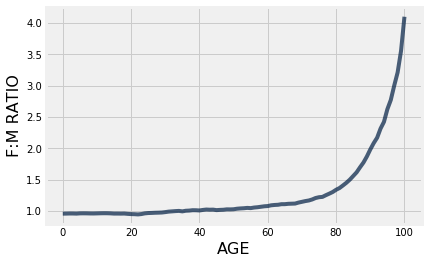

In [95]:
ratios.plot('AGE')

## Why? Our data analysis raises questions that are the topic of research.

[Why do women live longer than men?](https://ourworldindata.org/why-do-women-live-longer-than-men)

[Why are there more baby boys than baby girls?](https://www.pewresearch.org/fact-tank/2013/09/24/the-odds-that-you-will-give-birth-to-a-boy-or-girl-depend-on-where-in-the-world-you-live/)